In [1]:
!python --version

Python 3.6.12 :: Anaconda, Inc.


In [2]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [52]:
import os

In [105]:
os.listdir("C:/Users/w10/Desktop/geo468E/water")

['subset_0_of_LC08_L1TP_178033_20130902_20170502_01_T1_resampled_green.tif',
 'subset_0_of_LC08_L1TP_178033_20130902_20170502_01_T1_resampled_near_infrared.tif',
 'subset_0_of_LT05_L1TP_178033_19970720_20180209_01_T1_radiance_2.tif',
 'subset_0_of_LT05_L1TP_178033_19970720_20180209_01_T1_radiance_4.tif']

In [106]:
#green 2013
band3_2013 = rasterio.open("C:/Users/w10/Desktop/geo468E/water/subset_0_of_LC08_L1TP_178033_20130902_20170502_01_T1_resampled_green.tif")
#nır 2013
band5_2013 = rasterio.open("C:/Users/w10/Desktop/geo468E/water/subset_0_of_LC08_L1TP_178033_20130902_20170502_01_T1_resampled_near_infrared.tif")
#green 1997
band2_1997 = rasterio.open("C:/Users/w10/Desktop/geo468E/water/subset_0_of_LT05_L1TP_178033_19970720_20180209_01_T1_radiance_2.tif")
#nır 1997
band4_1997 = rasterio.open("C:/Users/w10/Desktop/geo468E/water/subset_0_of_LT05_L1TP_178033_19970720_20180209_01_T1_radiance_4.tif")

In [107]:
#number of raster rows
band3_2013.height
#number of raster columns
band5_2013.width
#number of raster rows
band2_1997.height
#number of raster columns
band4_1997.width

1273

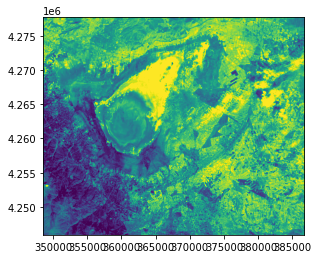

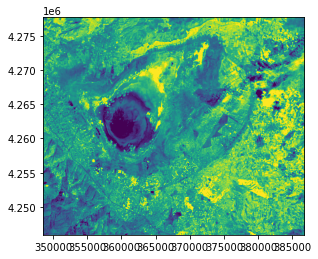

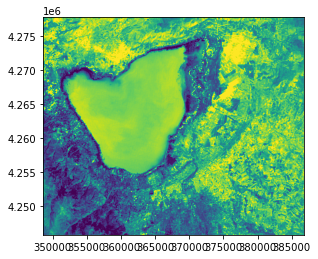

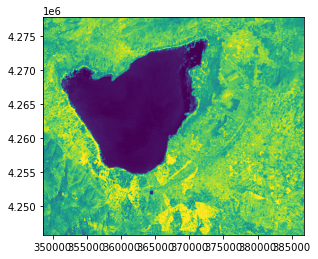

<AxesSubplot:>

In [110]:
#plot band 3 2013
plot.show(band3_2013)
#plot band 5 2013
plot.show(band5_2013)
#plot band 2 1997
plot.show(band2_1997)
#plot band 4 1997
plot.show(band4_1997)

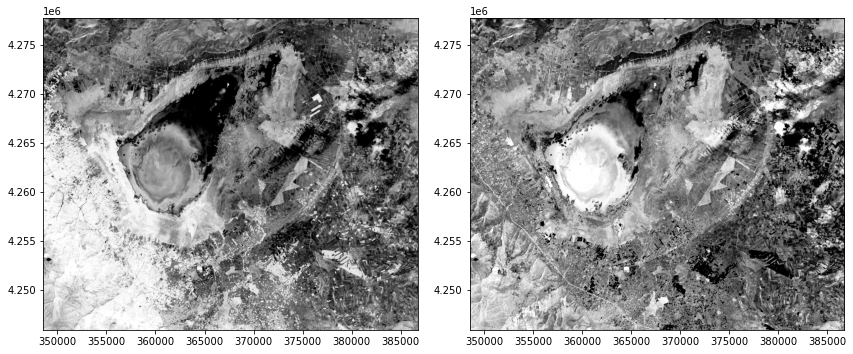

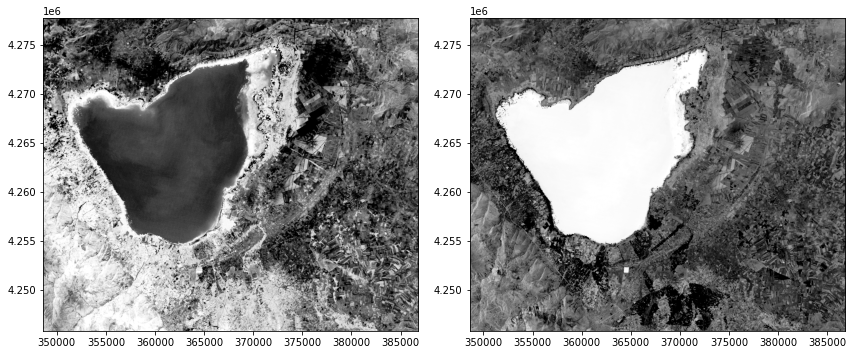

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band3_2013, ax=ax1, cmap='Greys') #green
plot.show(band5_2013, ax=ax2, cmap='Greys') #nir
fig.tight_layout()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band2_1997, ax=ax1, cmap='Greys') #green
plot.show(band4_1997, ax=ax2, cmap='Greys') #nir
fig.tight_layout()

In [112]:
green2013 = band3_2013.read(1).astype("float64")
nir2013 = band5_2013.read(1).astype("float64")
green1997 = band2_1997.read(1).astype("float64")
nir1997= band4_1997.read(1).astype("float64")

In [120]:
ndwi2013 = np.where(
    (green2013+nir2013)==0., 
    0, 
    (green2013-nir2013)/(green2013+nir2013))
ndwi2013[:10,:10]



C:\Users\w10\Anaconda3\envs\Geo468\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([[ 0.01503759,  0.02356902,  0.02614379,  0.07086614,  0.26708075,
         0.29192547,  0.2247191 ,  0.1875    ,  0.18974359,  0.18478261],
       [ 0.01694915,  0.02222222,  0.03378378,  0.1509434 ,  0.25      ,
         0.23497268,  0.1875    ,  0.18      ,  0.19      ,  0.1372549 ],
       [ 0.02167183,  0.02821317,  0.06666667,  0.20618557,  0.21311475,
         0.18518519,  0.16923077,  0.18      ,  0.16666667,  0.06224066],
       [ 0.01724138,  0.04262295,  0.14655172,  0.20812183,  0.18324607,
         0.16062176,  0.16751269,  0.1758794 ,  0.12037037,  0.04054054],
       [ 0.03592814,  0.06181818,  0.10344828,  0.14150943,  0.12077295,
         0.11764706,  0.10280374,  0.14285714,  0.10619469,  0.07092199],
       [ 0.1       ,  0.0965251 ,  0.08333333,  0.0754717 ,  0.0531401 ,
         0.04109589,  0.07692308,  0.16256158,  0.20588235,  0.1838565 ],
       [ 0.12676056,  0.12121212,  0.11646586,  0.1092437 ,  0.1040724 ,
         0.10132159,  0.1559633 ,  0.18518519

In [121]:
ndwi1997 = np.where(
    (green1997+nir1997)==0., 
    0, 
    (green1997-nir1997)/(green1997+nir1997))
ndwi1997[:10,:10]

C:\Users\w10\Anaconda3\envs\Geo468\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([[-0.07432432, -0.11186441, -0.14089347, -0.11186441, -0.07432432,
        -0.06270627, -0.07432432, -0.05841924, -0.02222222,  0.02222222],
       [-0.07792208, -0.11038961, -0.10457516, -0.10273973, -0.09655172,
        -0.08053691, -0.07432432, -0.03583062,  0.02005731,  0.02425876],
       [-0.11038961, -0.12460064, -0.1349481 , -0.11971831, -0.09570957,
        -0.07792208, -0.0420712 ,  0.02793296,  0.05343511,  0.04123711],
       [-0.10273973, -0.12666667, -0.11971831, -0.11032028, -0.11971831,
        -0.08053691, -0.03144654, -0.01994302,  0.01604278,  0.03157895],
       [-0.05647841, -0.10188679, -0.09236948, -0.1300813 , -0.13709677,
        -0.08710801, -0.05647841, -0.05841924, -0.01003344,  0.05396825],
       [-0.01149425, -0.0420712 , -0.11023622, -0.12062257, -0.08710801,
        -0.05647841, -0.07432432, -0.04195804,  0.05119454,  0.0609319 ],
       [ 0.01818182,  0.0129199 , -0.03768116, -0.06624606, -0.05230769,
        -0.06624606, -0.05128205,  0.00983607

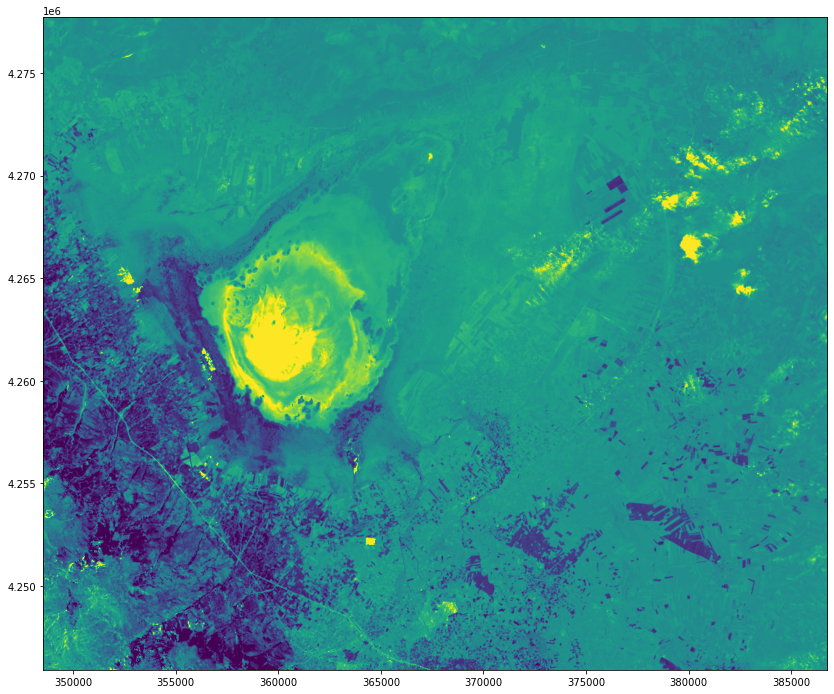

<AxesSubplot:>

In [122]:
ndwiImage2013 = rasterio.open("C:/Users/w10/Desktop/geo468E/water/ndwiImage2013.tiff","w",driver="Gtiff",
                          width=band3_2013.width, 
                          height = band3_2013.height, 
                          count = 1, crs=band3_2013.crs, 
                          transform=band3_2013.transform, 
                          dtype="float64")
ndwiImage2013.write(ndwi2013,1)
ndwiImage2013.close()

ndwi2013 = rasterio.open("C:/Users/w10/Desktop/geo468E/water/ndwiImage.tiff")
fig = plt.figure(figsize=(18,12))
plot.show(ndwi2013)



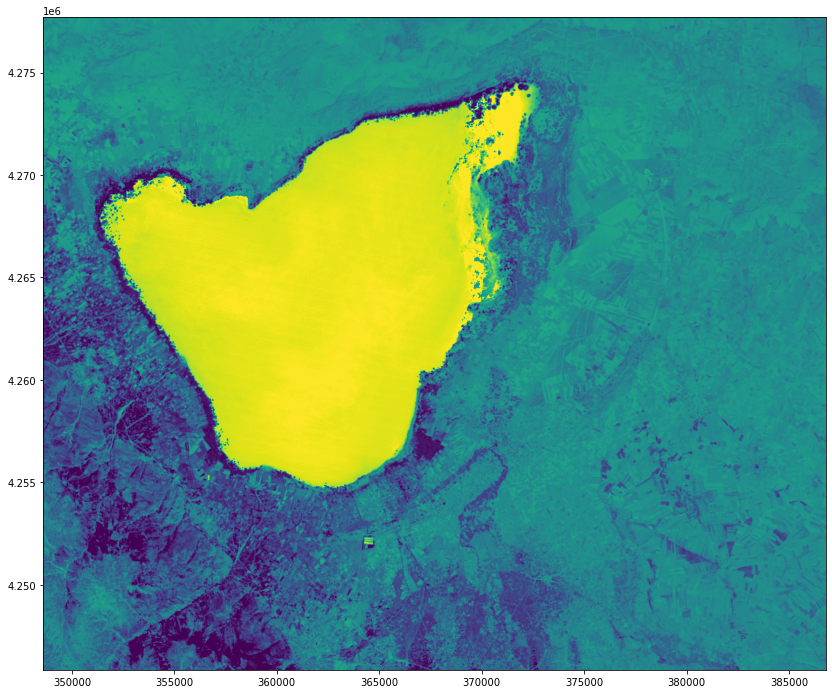

<AxesSubplot:>

In [123]:
ndwiImage1997 = rasterio.open("C:/Users/w10/Desktop/geo468E/water/ndwiImage1997.tiff","w",driver="Gtiff",
                          width=band2_1997.width, 
                          height = band2_1997.height, 
                          count = 1, crs=band2_1997.crs, 
                          transform=band2_1997.transform, 
                          dtype="float64")
ndwiImage1997.write(ndwi1997,1)
ndwiImage1997.close()

ndwi1997 = rasterio.open("C:/Users/w10/Desktop/geo468E/water/ndwiImage1997.tiff")
fig = plt.figure(figsize=(18,12))
plot.show(ndwi1997)

In [103]:
#histogram for 2013
def image_histogram(ndwi2013):
    from rasterio.plot import show_hist

    co, ce =show_hist(ndwi2013)
    fig = plt.figure(figsize=(10,7))
    fig.set_facecolor('white')
    plt.plot(ce[1::], co[1::])
    plt.show()

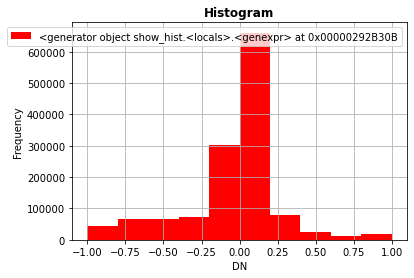

TypeError: 'NoneType' object is not iterable

In [124]:
%matplotlib inline
image_histogram(ndwi2013)

In [125]:
#histogram for 1997
def image_histogram(ndwi1997):
    from rasterio.plot import show_hist

    co, ce =show_hist(ndwi1997)
    fig = plt.figure(figsize=(10,7))
    fig.set_facecolor('white')
    plt.plot(ce[1::], co[1::])
    plt.show()

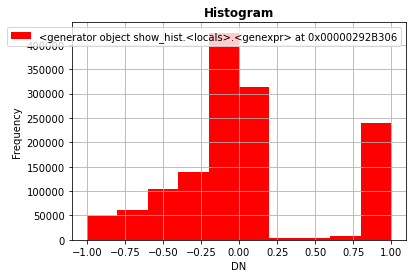

TypeError: 'NoneType' object is not iterable

In [126]:
%matplotlib inline
image_histogram(ndwi1997)

C:\Users\w10\Anaconda3\envs\Geo468\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\w10\Anaconda3\envs\Geo468\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


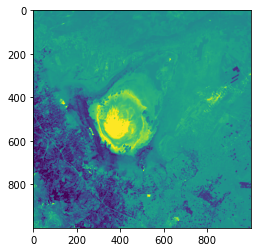

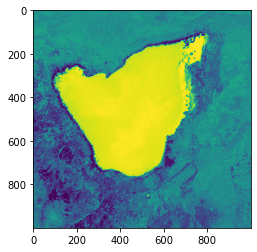

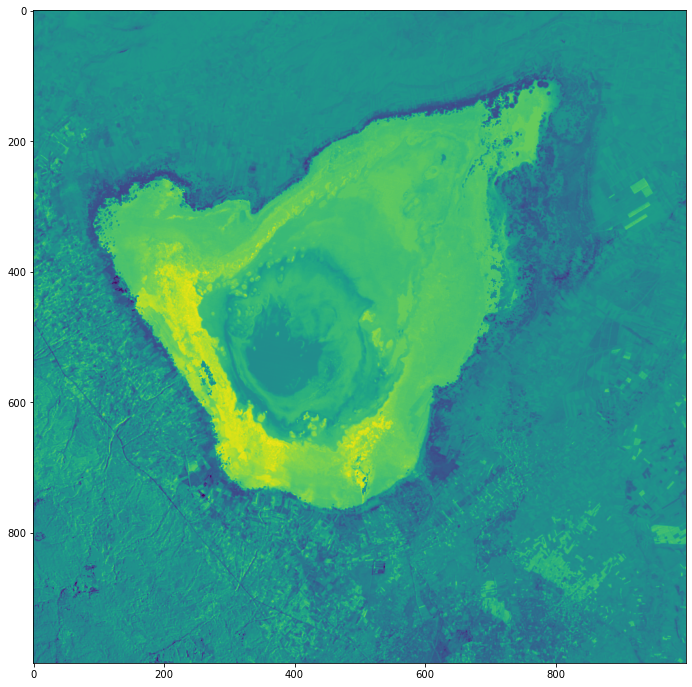

<AxesSubplot:>

In [129]:
ndwi2013=np.where(
    (green2013+nir2013)==0., 
    0, 
    (green2013-nir2013)/(green2013+nir2013))
ndwi2013[1:1:1]

ndwi1997=np.where(
    (green1997+nir1997)==0., 
    0, 
    (green1997-nir1997)/(green1997+nir1997))
ndwi1997[1:1:1]

plot.show(ndwi2013[:1000,:1000])
plot.show(ndwi1997[:1000,:1000])
fig = plt.figure(figsize=(18,12))
plot.show(ndwi1997[:1000,:1000]-ndwi2013[:1000,:1000])